In [11]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

1. [Basic concepts of ML](#ML)
2. [Linear Regression](#linreg)
3. [NDArray](#array)
4. [Find beta](#findbeta)
5. [More functions](#func)
6. [Review Problems](#hmwk)


# Statistics and Machine Learning<a id='ml'></a>

### Supervised Learning

<ul>
<li>Given a data set and already know what our correct output should look like
<li>Having the idea that there is a relationship between the input and the output
<li>Categorized into *regression* and *classification* problems
<li>Example: Can you predict marathon times based on 10K performance?
<li>**Can you think of another?**
</ul>

### Unsupervised Learning

<ul>
<li>Problems with little or no idea what our results should look like
<li>Derive structure from data where we don't necessarily know the effect of the variables
<li>No feedback based on the prediction results, i.e., there is no teacher to correct you
<li>Clustering, association, dimensionality reduction
<li>Example: What are the different types of people who use our product? What are the important features that distinguish our users?
<li>**Can you think of another?**
</ul>

Very common to combine, i.e. dimensionality reduction and linear regression


## Basic model building process

<ol>
<li>Identify a problem to be solved
<li>Get some data
<li>Clean the data - standardize columns
<li>Exploratory analysis - histograms, scatter plots, summaries
<li>Clean it some more
<li>Identify target features (if supervised learning)
<li>Fit a model to the data - Machine Learning!
<ul>
<li>Split the data into a training and testing set (more on this later)
<li>Train a model. Tune parameters.
<li>Select the appropriate measure of fit. Accuracy, F1 score, AUC, Confusion matrix (more later!)
<li>Test the model. Beware of overfitting and underfitting! (more on this later)
<li>If you're happy with the results, you're done!
<li>Otherwise:
<ol>
<li>The model is misspecified. Repeat the above steps.
<li>The data aren't telling the whole story - are you missing any? Is there too much noise?
<li>The question isn't answerable using the data you have
</ol>
</ul>
</ol>

# Linear Regression<a id='linreg'></a>

### Motivation

<ul>
<li>Make predictions about real-world quantities, like sales or life expectancy
<li>Understand relationship between variables
<li>Examples:
<ul>
<li>How does sales volume change with changes in price. How is this affected by changes in the weather?
<li>How are the conversions on an ecommerce website affected by two different page titles in an A/B comparison?
<li>How is the interest rate charged on a loan affected by credit history and by loan amount?
</ul>
</ul>

### Model set up

Simple linear regression takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response (or dependent variable or target)
- sometimes you see it as $\hat{y_i}$ which represents an estimate (or prediction) rather than the true value
- $x$ is the feature (or covariate or predictor or independent variable or feature)
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x
- many assumptions are baked into this model (random noise, constant variance, ... all of which are out of scope)

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients** (or feature weights). To create your model, you must "learn" the values of these coefficients.

### Another way to write it!

<ul>
<li>In practice use matrices and vectors because we have many data points, i.e.$(x,y)$ pairs
<li>Written as $\mathbf{y = \beta x}$ where<br><br>
</ul>

$\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \mathbf{x} = \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_n \end{pmatrix}, \beta =   \begin{pmatrix} \beta_1 \\ \beta_2 \end{pmatrix}$  <br>

**Question**: 
<ol>
<li>Why did we add the column of 1's?<br>
<li>Why did we write it as $\mathbf{y = \beta x}$ instead of $\mathbf{y = x\beta}$?
</ol>

# How to solve for $\beta?$

Using `numpy`
====

<ul>
<li>The foundation for numerical computation in Python is the `numpy` package, and essentially all scientific libraries in Python are built on this - e.g. `scipy`, `pandas`, `statsmodels`, `scikit-learn`, `cv2` etc. 
<li>The basic data structure in `numpy` is the NDArray, and it is essential to become familiar with how to slice and dice this object.
<li>Lots of helper methods built in - much better than using lists for anything numeric
<li>`numpy` has a bunch of other helpful modules like `random` and `linalg`
</ul>

## NDArray<a id='array'></a>

The base structure in `numpy` is `ndarray`, used to represent vectors, matrices and higher-dimensional arrays. Each `ndarray` has the following attributes:

- `dtype` = correspond to data types in C
- `shape` = dimensions of array
- **Each element of the array is of the same type**
- dimensions are called `axes`

In [70]:
x = np.array([1,2,3,4,5,6])
print "x =", x
print 'dytpe:', x.dtype
print 'shape:', x.shape
print 'ndim:', x.ndim
print 'size:', x.size
print 'type:', type(x)

x = [1 2 3 4 5 6]
dytpe: int64
shape: (6,)
ndim: 1
size: 6
type: <type 'numpy.ndarray'>


In [101]:
x.shape = (2,3)    # make it into a 2x3 matrix
print  x
print 'dytpe:', x.dtype
print 'shape:', x.shape
print 'ndim:', x.ndim
print 'size:', x.size
print 'type:', type(x)

[[1 2 3]
 [4 5 6]]
dytpe: int64
shape: (2, 3)
ndim: 2
size: 6
type: <type 'numpy.ndarray'>


### Array creation

<ul>
<li>`dtype`
<li>`arange`
<li>`reshape`, `repeat`, `diag`, `ones`, `zeros`
<li>3d array
</ul>

In [8]:
y = np.array([1,2,3])  # note the square brackets
y

array([1, 2, 3])

In [9]:
y = np.array([1,2,3], dtype = np.float64)    # note the decimals
y

array([ 1.,  2.,  3.])

In [10]:
print np.arange(10)  # numpy object
print range(10)    # regular list

[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [11]:
print np.arange(10)+1
print range(10)+1

[ 1  2  3  4  5  6  7  8  9 10]


TypeError: can only concatenate list (not "int") to list

In [16]:
print np.array([[1,2,3],[4,5,6],[7,8,9]])   # multi dimensional
print "\nshape =",np.array([[1,2,3],[4,5,6],[7,8,9]]).shape

[[1 2 3]
 [4 5 6]
 [7 8 9]]

shape = (3, 3)


In [18]:
print np.array([[1,2,3],[4,5,6],[7,8,9,10]])   # not all sublists are same length - no error
print "\nshape =",np.array([[1,2,3],[4,5,6],[7,8,9,10]]).shape

[[1, 2, 3] [4, 5, 6] [7, 8, 9, 10]]

shape = (3,)


### `numpy` helper functions to initialize array

In [19]:
np.ones(10)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [20]:
np.zeros((5,7))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [24]:
np.zeros(5*7).reshape(5,7)  # specify how many element, then their size

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [440]:
np.eye(5)   # identity

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [26]:
np.diag(np.arange(1,6))

array([[1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 5]])

In [36]:
np.repeat([1,2,3,4],4)   # how to stack arrays?

array([1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4])

In [35]:
np.repeat([1,2,3,4],4).reshape(4,4).T   # transpose is EXTREMELY handy. learn to love it

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

### Array indexing

In [69]:
x

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [38]:
x[0]

array([1, 2, 3])

In [40]:
print x[0][0]   # preferred
print x[0,0]

1
1


In [41]:
x[0,:]

array([1, 2, 3])

In [46]:
x[:,1]    # what is this doing?   # note: loses it's shape when you pull out a vector

array([2, 5])

In [47]:
x[:,1:3]

array([[2, 3],
       [5, 6]])

In [48]:
x[:,-1]    

array([3, 6])

In [49]:
x[:,:-1]   

array([[1, 2],
       [4, 5]])

### Boolean indexing

In [52]:
x > 2

array([[False, False,  True],
       [ True,  True,  True]], dtype=bool)

In [54]:
x[x > 2]   # note the result is different shape

array([3, 4, 5, 6])

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1) Find the absolute difference between the sum of the even numbered elements and the odd numbered elements of the following matrix:

`x = np.arange(100).reshape(10,10)`

2) Create a `5x5` matrix of zeros with values `1,2,3,4` just below the diagonal.

```python
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]
```

3) Create an `8x8` matrix and fill it with a checkerboard pattern of `1` and `0`

```python
[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
```

4) Create the following matrix:

```python
[[110   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]
```
5) Create a 10x10 matrix with 1's on the border and 0's inside:

```python
[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
```

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [2]:
## SOLUTION
import numpy as np
x = np.arange(100).reshape(10,10)



even = sum(x[x % 2 == 0])
odd = sum(x[x % 2 != 0])

print abs(even - odd)

50


In [56]:
## SOLUTION

print np.diag(1 + np.arange(4), k=-1)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


In [57]:
## SOLUTION

z = np.zeros((8,8), dtype=int)
z[1::2,::2] = 1
z[::2,1::2] = 1
print z

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


In [6]:
## SOLUTION

print np.diag(np.arange(0,111)[::-10])

[[110   0   0   0   0   0   0   0   0   0   0   0]
 [  0 100   0   0   0   0   0   0   0   0   0   0]
 [  0   0  90   0   0   0   0   0   0   0   0   0]
 [  0   0   0  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0  70   0   0   0   0   0   0   0]
 [  0   0   0   0   0  60   0   0   0   0   0   0]
 [  0   0   0   0   0   0  50   0   0   0   0   0]
 [  0   0   0   0   0   0   0  40   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30   0   0   0]
 [  0   0   0   0   0   0   0   0   0  20   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]]


In [59]:
## SOLUTION

X = np.ones((10,10))
X[1:-1,1:-1] = 0
print X

[[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


Combining and splitting arrays
----

In [102]:
x

array([[1, 2, 3],
       [4, 5, 6]])

In [109]:
print np.array([x,x])
print "\nshape:",np.array([x,x]).shape # 3 dim array

[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]

shape: (2, 2, 3)


In [114]:
np.r_[x,x]

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [115]:
np.vstack([x, x])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [116]:
np.concatenate([x, x], axis=0)

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [117]:
np.c_[x,x]

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [118]:
np.hstack([x, x])

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [119]:
y = np.r_[x, x]
y

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [133]:
a, b, c = np.hsplit(y, 3)

In [134]:
a

array([[1],
       [4],
       [1],
       [4]])

In [135]:
b

array([[2],
       [5],
       [2],
       [5]])

In [136]:
c

array([[3],
       [6],
       [3],
       [6]])

Reductions
----

In [137]:
y = y[:2]

In [138]:
y.sum(), np.sum(y)

(21, 21)

In [139]:
y.sum(0), np.sum(y, axis = 0) # column sum. np.sum() is much faster

(array([5, 7, 9]), array([5, 7, 9]))

In [140]:
y.sum(1), np.sum(y, axis = 1) # row sum

(array([ 6, 15]), array([ 6, 15]))

### Standardize matrix

In [150]:
y = np.array([1,2,3,4])
z = (y - np.mean(y))/np.std(y)

In [151]:
z

array([-1.34164079, -0.4472136 ,  0.4472136 ,  1.34164079])

In [152]:
z.mean(), z.std()

(0.0, 1.0)

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
from __future__ import division

## EXERCISE TIME!

Given the following matrix:
```python
      [[7, 8, 8],
       [1, 3, 8],
       [9, 2, 1]]
```

Normalize the matrix so that all rows sum to 1.0.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [153]:
## SOLUTION

def normalize_transition(M):
    
    P = np.empty(M.size).reshape(M.shape[0],M.shape[1])
    # normalize by row
    for i in range(M.shape[0]):
        P[i] = M[i,:]/np.sum(M, axis=1)[i]
    
    return P

import numpy as np
M = np.array([7,8,8,1,3,8,9,2,1.0]).reshape(3,3)

normalize_transition(M)

array([[ 0.30434783,  0.34782609,  0.34782609],
       [ 0.08333333,  0.25      ,  0.66666667],
       [ 0.75      ,  0.16666667,  0.08333333]])

## How to figure out $\beta_0$ and $\beta_1$<a id='findbeta'></a>

<ul>
<li>Want to find line of best fit
<li>Minimize the distances between the line and each data point
<li>Adjust $\beta$s in order to make the sum of the squared residuals, $SSE_{res}$, as small as possible (hence called "least squares").
<li>Residual, $r_i$, is the vertical distance between a data point, $y_i$, and the line estimate, $\hat{y_i}$.
$$\text{min}\sum_{i=1}^{n} SSE_{res}= \text{min}\sum_{i=1}^{n}r_i^2 = \text{min}\sum_{i=1}^{n}(y_i - \hat{y_i})^2 = \text{min}\sum_{i=1}^{n}(y_i - \beta_0 - \beta_1 x_i)^2$$
</ul>

### Can be solved in 3 ways:

#### 1) Using calculus. This is used for simple cases only. Not in practice.<br>

$$\beta_1 = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{\sum_{i=1}^n (x_i - \bar{x})^2} $$<br>
$$\beta_0 = \bar{y} - \beta_1\bar{x}$$

#### 2) Using linear algebra. Inverses and matrix multiplication can be expensive. In practice these quantities are approximated.<br>

$y=x\beta$<br>
$x^Ty=x^T x\beta$  `// multiply both sides by` $x^T$<br>
$(x^T x)^{-1}x^Ty=\beta$ `// "divide" both sides by` $(x^Tx)^{-1}$

#### 3) Using numerical approximation - this is what's used in practice. Out of scope.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [9]:
X = np.column_stack([x,np.ones(len(x))])
np.dot(X.T,X)

## EXERCISE TIME

Given the following data points:

```python
x = np.array([1,2,3,4,5,6,7])
y = np.array([0,-0.5,3,6,11,5,15])
```

1) Solve for $\beta$ using the formulas for $\beta_1$ and $\beta_0$. You should have a value for $\beta_1$ and $\beta_0$

2) Solve for $\beta$ using linear algebra. Is it the same as above?

Hint 1: Remember to keep the dimensions correct<br>
Hint 2: Always use `np.dot(a,b)` or `a.dot(b)` when doing matrix multiplication.<br>
Hint 3: Look up the `inv()` function in the `linalg` library of `numpy`.

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Using the formulas
b1 = 2.28571428571
b0 = -3.5

Using linear algebra
b1 = 2.28571428571
b0 = -3.5


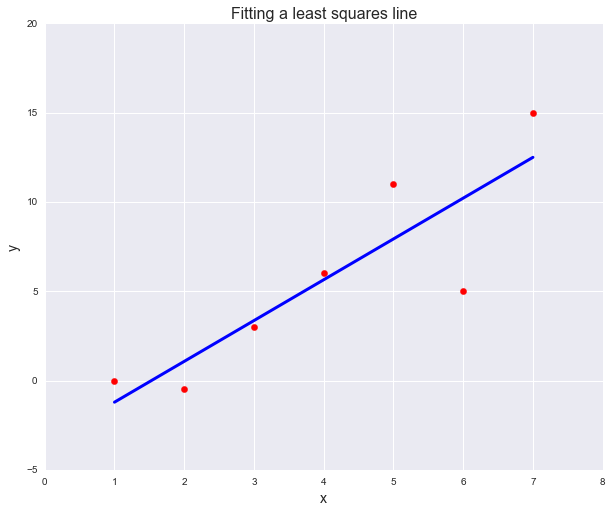

In [12]:
## SOLUTION
from numpy import linalg as la


x = np.array([1,2,3,4,5,6,7])
y = np.array([0,-0.5,3,6,11,5,15])

b1 = sum((np.mean(x)-x)*(np.mean(y)-y))/sum((np.mean(x)-x)**2)
b0 = np.mean(y) - b1*np.mean(x)
print "Using the formulas"
print "b1 =", b1
print "b0 =", b0
print

X = np.column_stack([x,np.ones(len(x))])

b1 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[0]
b0 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[1]
print "Using linear algebra"
print "b1 =", b1
print "b0 =", b0

plt.figure(figsize=(10,8))
plt.title("Fitting a least squares line",size=16)
plt.scatter(x,y,s=40,color='red')
plt.plot(x, b0 + b1*x, color='blue', linewidth=3)
plt.ylabel('y',size=14)
plt.xlabel('x',size=14)
plt.show()

## Let's do it using real data!

Dataset:  birthrate.dat<br>

Source: R. Weintraub (1962). "The Birth Rate and Economic Development:
      An Empirical Study", Econometrica, Vol. 40, #4, pp 812-817.

Description: Birth Rates, per capita income, proportion (ratio?) of 
population in farming, and infant mortality during early 1950s for
30 nations.

```
Variables/Columns:
Nation   1-20
Birth Rate  22-25  /* 1953-1954 (Units not given)  */
Per Capita Income    30-33    /*  1953-1954 in 1948 US $  */
Proportion of population on farms   38-41 /*   Circa 1950  */ 
Infant Mortality Rate    45-49   /*  1953-1954  */
```

In [16]:
import re
from sklearn import linear_model

with open('regression.txt') as f:
    text = f.readlines()
    
data = np.empty(len(text)*4).reshape(len(text),4)

for e, r in enumerate(text):
    temp = re.sub(' + ',' ',r)
    data[e] = temp[re.search("\d", temp).start():].strip('\n').split(' ')  # use regex to skip Nation variable

IOError: [Errno 2] No such file or directory: 'regression.txt'

In [156]:
data[0]

array([  46.4,  392. ,    0.4,   68.5])

In [157]:
x = data.T[0]  # birth rate
y = data.T[3]  # per capita income

In [158]:
X = np.column_stack([x,np.ones(len(x))])

b1 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[0]
b0 = la.inv(np.dot(X.T,X)).dot(X.T).dot(y.T)[1]

print "b1 =", b1
print "b0 =", b0


b1 = 2.04566089202
b0 = 1.85610298035


In [160]:
clf = linear_model.LinearRegression(fit_intercept=False) # include an intercept term
clf.fit(X,y)
pred = clf.predict(X)
print "b1 =",clf.coef_[0]
print "b0 =",clf.coef_[1]

b1 = 2.04566089202
b0 = 1.85610298035


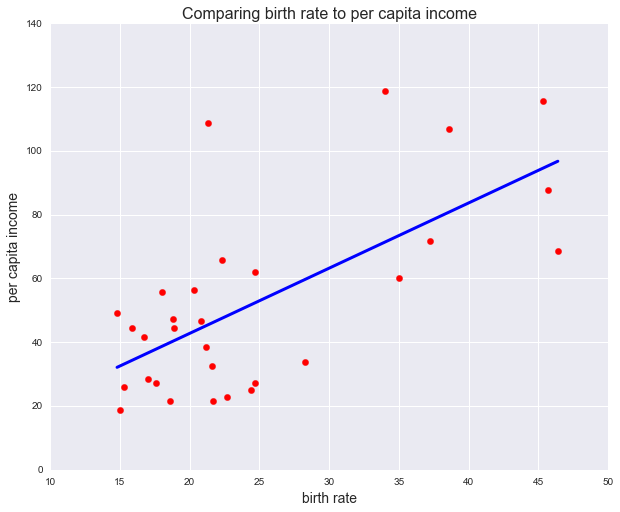

In [161]:
plt.figure(figsize=(10,8))
plt.title("Comparing birth rate to per capita income",size=16)
plt.scatter(x,y,s=40,color='red')
plt.plot(x, pred, color='blue', linewidth=3)
plt.ylabel('y',size=14)
plt.xlabel('x',size=14)
plt.xlabel('birth rate')
plt.ylabel("per capita income")
plt.show()

# Lots more to cover about Linear Regression...in another class!

## More useful functions<a id='func'></a>

<ul>
<li>`linspace()`
<li>`argsort()`
<li>`argmax()`, `where()`
<li>`ravel()`
<li>`tile()`
</ul>

In [162]:
np.linspace(0,100,11)

array([   0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,
         90.,  100.])

In [163]:
z = np.random.random(10)
print z
print np.argmax(z)

[ 0.36700677  0.85300395  0.44545784  0.55732475  0.08174063  0.16406548
  0.01607512  0.72105686  0.14898321  0.55241547]
1


In [164]:
print z[np.argsort(z)]

[ 0.01607512  0.08174063  0.14898321  0.16406548  0.36700677  0.44545784
  0.55241547  0.55732475  0.72105686  0.85300395]


In [165]:
print z[np.argsort(z)[::-1]]   ## reverse order

[ 0.85300395  0.72105686  0.55732475  0.55241547  0.44545784  0.36700677
  0.16406548  0.14898321  0.08174063  0.01607512]


In [166]:
z = np.linspace(1,100,20)
c = np.random.choice(z)
print z
print c

[   1.            6.21052632   11.42105263   16.63157895   21.84210526
   27.05263158   32.26315789   37.47368421   42.68421053   47.89473684
   53.10526316   58.31578947   63.52631579   68.73684211   73.94736842
   79.15789474   84.36842105   89.57894737   94.78947368  100.        ]
16.6315789474


In [167]:
idx = np.where(z == c)
print idx

(array([3]),)


In [168]:
print z[idx]

[ 16.63157895]


In [169]:
z = np.arange(10*10).reshape(5,20)
print z

[[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]]


In [170]:
print z.ravel()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


In [171]:
print np.tile( [[1, 2],[-2, -1]], [5, 3])

[[ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]
 [ 1  2  1  2  1  2]
 [-2 -1 -2 -1 -2 -1]]


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## EXERCISE TIME

1. Write a program to create a checkerboard `8x8` matrix using the `tile` function

2. Write a program to find the closest value (to a given number) in an array ? 


In [172]:
## SOLUTION - 1

Z = np.tile( np.array([[0,1],[1,0]]), (4,4))
print Z

## SOLUTION - 2

Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print Z[index]

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]
91


+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Review Problems<a id='hmwk'></a>

**Q1**.

Write a program to swap any 2 rows of a numpy array. Hint: This is a one liner.

In [238]:
# SOLUTION

A = np.arange(25).reshape(5,5)
A[[0,1]] = A[[1,0]]
print A

[[ 5  6  7  8  9]
 [ 0  1  2  3  4]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


**Q2.**

Write two ways to get the diagonal elements of a dot product of two matrices, A and B.

In [239]:
## SOLUTION

A = np.arange(25).reshape(5,5)
B = np.arange(25).reshape(5,5)

print np.diag(np.dot(A, B))
print np.sum(A * B.T, axis=1)

[ 150  435  770 1155 1590]
[ 150  435  770 1155 1590]


**Q3.** Write a 12 by 12 times table matrix shwon below. Do this 

- using nested for loops
- uisng numpy fromfunction array constructor
- using numpy broadcasting 
```
array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12],
       [  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24],
       [  3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36],
       [  4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48],
       [  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60],
       [  6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72],
       [  7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84],
       [  8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88,  96],
       [  9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99, 108],
       [ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120],
       [ 11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121, 132],
       [ 12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144]])
```

In [271]:
## SOLUTION

import numpy as np
n = 12

def nested_loops(n):
    print("... using nested for loops...")

    for_list = np.empty([n,n],dtype=int) # initialize 12 x 12 numpy array
    for i in range(1,n+1):
        row_vals = np.empty([n]) # initialize an array for each row
        for j in range(1,13):
            row_vals[j-1] = j*i

        for_list[i-1] = row_vals
    
    return for_list


print nested_loops(n)
print

def fromfunction(n):
    print("... using numpy fromfunction array constructor...")

    return np.fromfunction(lambda i, j: (i+1) * (j+1), (n, n), dtype=int)

print fromfunction(n)
print

def broadcasting(n):
    print("...using numpy broadcasting...")
    a = np.arange(1,n+1)
    b = np.arange(1,n+1)

    return np.reshape(a,(n,1))*b # calculate outer product

print broadcasting(n)

... using nested for loops...
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   4   6   8  10  12  14  16  18  20  22  24]
 [  3   6   9  12  15  18  21  24  27  30  33  36]
 [  4   8  12  16  20  24  28  32  36  40  44  48]
 [  5  10  15  20  25  30  35  40  45  50  55  60]
 [  6  12  18  24  30  36  42  48  54  60  66  72]
 [  7  14  21  28  35  42  49  56  63  70  77  84]
 [  8  16  24  32  40  48  56  64  72  80  88  96]
 [  9  18  27  36  45  54  63  72  81  90  99 108]
 [ 10  20  30  40  50  60  70  80  90 100 110 120]
 [ 11  22  33  44  55  66  77  88  99 110 121 132]
 [ 12  24  36  48  60  72  84  96 108 120 132 144]]

... using numpy fromfunction array constructor...
[[  1   2   3   4   5   6   7   8   9  10  11  12]
 [  2   4   6   8  10  12  14  16  18  20  22  24]
 [  3   6   9  12  15  18  21  24  27  30  33  36]
 [  4   8  12  16  20  24  28  32  36  40  44  48]
 [  5  10  15  20  25  30  35  40  45  50  55  60]
 [  6  12  18  24  30  36  42  48  54  60  66  72]


**Q4**.

Here is the normalized transition matrix from the exercise above:

```python
 P = [[ 0.30434783  0.34782609  0.34782609]
     [ 0.08333333  0.25        0.66666667]
     [ 0.75        0.16666667  0.08333333]]
 ```

Find the stationary distribution. You can do this by raising this matrix to a very large power, until the result doesn't change. For example:

$P^1$ = 
```python
    [[ 0.30434783  0.34782609  0.34782609]
     [ 0.08333333  0.25        0.66666667]
     [ 0.75        0.16666667  0.08333333]]
```

$P^2$ = 
```python
[[ 0.38248267  0.25078765  0.36672968]
 [ 0.54619565  0.20259662  0.25120773]
 [ 0.30464976  0.31642512  0.37892512]]
 ```
 
$P^3$ = 
```python
[[ 0.412354    0.25685598  0.33079002]
 [ 0.37152231  0.28249821  0.34597949]
 [ 0.40328209  0.2482256   0.34849231]]
```

With a large enough power, $P^{n} = P^{n+1}$. Write a function that can raise $P$ to any arbitrary power, n.

In [241]:
## SOLUTION

def raise_nth_power(n,transition):
    ''' Solve for stationary distribution by raising to the nth power '''
    
    temp = transition
    for i in range(n-1):    
        temp = transition.dot(temp)
    
    return temp

print raise_nth_power(3,P)

[[ 0.412354    0.25685598  0.33079002]
 [ 0.37152231  0.28249821  0.34597949]
 [ 0.40328209  0.2482256   0.34849231]]


**Q5.** Calculating moments: Moment Generating Functions

Write a function that calculates the moment, $t$ for a given probability distribution, $x$. The function should have the signature `discrete_mgf(x, t)` where:<br>

- `x` is a discrete `2D` probability vector where:
  - The first dimension are values that `X` can take. 
  - The second dimension is the probabilities that `X` takes on those values. 
    - *These should add to `1.0`*
    - *Both dimensions of `x` should be of the same length*
- `t` is the moment.


Moment Generating Functions are defined as:<br>

$$
M_x(t) = E[e^{tX}]
$$

For example:<br>

$$
    \begin{equation}
             \nonumber p_X(k) = \left\{
            \begin{array}{2 1}
              \frac{1}{6} & \quad  k=1\\
			   &  \quad   \\
               \frac{2}{6}  & \quad  k=2\\
			   &  \quad   \\
               \frac{3}{6}  & \quad  k=-1\\
            \end{array} \right.
    \end{equation}
$$

$E[e^{tX}] = \sum_{k=1}^{n} f_X(k)p_X(k) = \frac{1}{6}e^{(1)t} + \frac{2}{6}e^{(2)t} + \frac{3}{6}e^{(-1)t}$.<br>
<br>
When $t=2, E[e^{2X}] = \frac{1}{6}e^{(1)\times2} + \frac{2}{6}e^{(2)\times2} + \frac{3}{6}e^{(-1)\times2} = 19.5$



In [242]:
## SOLUTION

def discrete_mfg(x, t):
    
    assert np.allclose(sum(x[1]),1.0)
    assert len(x[0]) == len(x[1])
    
    return sum(np.exp(x[0]*t)*x[1])

x = np.array([[1,2,-1],[1./6,2./6,3./6]])
t = 2
discrete_mfg(x,t)

19.498560335821491

**Q6**.

Write a function that computes moving averages for an array and window size. For example

```python 
a = [0, 3, 3, 3, 9, 6, 9, 9, 12]
size = 3

moving_average(a, size = 3) = [  2.   3.   5.   6.   8.   8.  10.]
```

In [270]:
## SOLUTION

def moving_average(a, n) :

    ret = np.cumsum(a)
    ret[n:] = ret[n:] - ret[:-n]
    
    return ret[n - 1:] / n

a = [0,3,3,3,9.,6,9,9,12]
print moving_average(a, 3)

[  2.   3.   5.   6.   8.   8.  10.]
